In [1]:
import pandas as pd
import os

data = pd.read_csv('nonprofit_data.csv')

In [4]:
# data cleaning
data = data.drop(columns=['strein','sub_name','ntee_code','id','careofname','address','created_at','updated_at'])

In [5]:
data.head()

,ein,name,city,state,score,zipcode,ruling_date,asset_amount,income_amount,revenue_amount
0,116037894,010-323 FRANKLIN ELEM SCHOOL PTA,HEMPSTEAD,NY,2.764479,12090-0162,1994-08-01,0,0,0
1,161530784,0SWEGO COUNTY DEPUTIES ASSOCIATION,OSWEGO,NY,2.764479,12090-0162,1994-08-01,0,0,0
2,823270255,1 FREEDOM FOR ALL,BRONX,NY,2.764479,12090-0162,1994-08-01,0,0,0
3,113195645,1 IN 9 THE LONG ISLAND BREAST CANCER ACTION CO...,HEWLETT,NY,2.764479,12090-0162,1994-08-01,0,0,0
4,261211059,1 SG MICHAEL S CURRY MEMORIAL FOUNDATION INC,NEW YORK,NY,2.764479,12090-0162,1994-08-01,0,0,0


In [18]:
# remove punctuation and lower casing
import re

data['description_processed'] = data['description'].map(lambda x: re.sub('[,\.!?]', '',x))
data['description_processed'] = data['description_processed'].map(lambda x: x.lower())
data['description_processed'].head()

0    hempstead
1       oswego
2        bronx
3      hewlett
4     new york
Name: city_processed, dtype: object

In [19]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


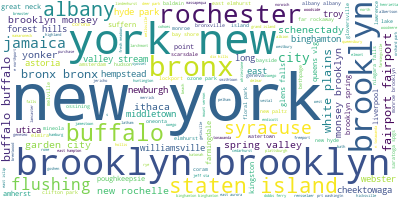

In [20]:
from wordcloud import WordCloud

desc = ','.join(list(data['description_processed'].values))

wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(desc)
wordcloud.to_image()

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# initialize count vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# fit and transform processed descriptions for each legal entity
count_data = count_vectorizer.fit_transform(data['description_processed'])

In [22]:
def print_topics(model, vectorizer, top_words):
    words = vectorizer.get_feature_names()
    for index, topic in enumerate(model.components_):
        print(f"\nTopic {index}:" )
        print(" ".join([words[i]
                        for i in topic.argsort()[:-top_words - 1:-1]]))

In [23]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# using LDA model 
from sklearn.decomposition import LatentDirichletAllocation as LDA

# set parameters for LDA
num_topics = 2
num_words = 10

# create and fit the LDA model
lda = LDA(n_components=num_topics)
lda.fit(count_data)

print("Topics found by LDA:")
print_topics(lda, count_vectorizer, num_words)

Topics found by LDA:

Topic 0:
brooklyn rochester albany park syracuse city east monsey valley binghamton

Topic 1:
new york bronx buffalo island staten flushing jamaica fairport ithaca
